In [1]:
import pandas as pd
import time
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
!pip install pyfim==6.28
from fim import apriori, eclat, fpgrowth

     |████████████████████████████████| 358kB 5.9MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp37-cp37m-linux_x86_64.whl size=537730 sha256=25dce3b4ca1b00046ad22cf86b9ec83e09313f16f2c79e2541d7433c72df9315
  Stored in directory: /root/.cache/pip/wheels/19/ac/b4/9ae8ceb2208d78b21b1157f8561cc4469d236b7d785e7422f1
Successfully built pyfim


Add functions for execute algorithms.

In [2]:
def call_apriori(data, min_sup, min_len):
  start_time = time.time()
  result = apriori(data, supp = min_sup, report = 's', zmin = min_len)
  fin_time = time.time() - start_time
  return result, fin_time

In [3]:
def call_eclat(data, min_sup, min_len):
  start_time = time.time()
  result = eclat(data, supp = min_sup, report = 's', zmin = min_len)
  fin_time = time.time() - start_time
  return result, fin_time

In [4]:
def call_fpgrowth(data, min_sup, min_len):
  start_time = time.time()
  result = fpgrowth(data, supp = min_sup, report = 's', zmin = min_len)
  fin_time = time.time() - start_time
  return result, fin_time

In [5]:
def call_algorithms(data, min_sup, min_len = 1):
  apriori_result, apriori_time = call_apriori(data, min_sup, min_len )
  eclat_result, eclat_time = call_eclat(data, min_sup, min_len)
  fpgrowth_result, fpgrowth_time = call_fpgrowth(data, min_sup, min_len)
  results = {'apriori': apriori_result, 'eclat': eclat_result,  'fpgrowth': fpgrowth_result,}
  times = {'apriori': apriori_time, 'eclat': eclat_time, 'fpgrowth': fpgrowth_time, }
  return results, times

In [6]:
def print_results(results):
  for record in results:
        print('Set: ' + str(record[0]) + '\nSupport: ' + str(record[1]))

In [7]:
def process_data(data, isNone=False):
  data = data.to_numpy()
  if(isNone):
    data_list = [a[a != np.array(None)] for a in data]
  else:
    data_list = [[i for i in a if i == i] for a in data]
  return data_list

In [8]:
basket_data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
airports_data = pd.read_csv('airports.dat', header=None)
basket_data_list = process_data(basket_data)
airports_data_list = process_data(airports_data)
retail_data = pd.read_csv('retail.dat', header=None, sep='\s\s+', engine='python', names=['items'])
retail_data = retail_data['items'].str.split(' ',expand=True)
retail_data_list =  process_data(retail_data, isNone=True)

In [31]:
result, _ = call_apriori(airports_data_list, 2, 6)
print_results(result)

Set: ('America/Los_Angeles', 'United States', 'A', 'OurAirports', 'airport', '-8')
Support: 0.020914523252792933
Set: ('America/Anchorage', 'United States', 'A', 'OurAirports', 'airport', '-9')
Support: 0.02247336970641725
Set: ('Europe/Paris', 'France', 'E', 'OurAirports', 'airport', '1')
Support: 0.026500389711613406
Set: ('Europe/Berlin', 'E', 'OurAirports', 'airport', 'Germany', '1')
Support: 0.028319043907508445
Set: ('America/Chicago', 'United States', 'A', 'OurAirports', 'airport', '-6')
Support: 0.043907508443751624
Set: ('America/New_York', '-5', 'United States', 'A', 'OurAirports', 'airport')
Support: 0.05624837620161081
Set: ('-5', 'United States', 'A', '\\N', 'OurAirports', 'airport')
Support: 0.020654715510522212


In [ ]:
def draw_results(apriori_times, eclat_times, fpgrowth_times, amount_sets, longest_set, lens_sets, supports):
  fig, ax = plt.subplots(2, 2, sharex = True, figsize = (15, 10))

  ax[0, 0].plot(supports, apriori_times)
  ax[0, 0].plot(supports, eclat_times)
  ax[0, 0].plot(supports, fpgrowth_times)
  ax[0, 0].legend(['Apriori', 'ECLAT', 'FP growth' ])
  ax[0, 0].set_title('Затраченное время')
  ax[0, 0].set(xlabel = 'Support, %', ylabel = 'Время, сек')

  ax[0, 1].plot(supports, amount_sets)
  ax[0, 1].set_title('Общее количество частых наборов объектов')
  ax[0, 1].set(xlabel = 'Support, %', ylabel = 'Наборы')

  ax[1, 0].plot(supports, longest_set)
  ax[1, 0].set_title('Максимальная длина частого набора объектов')
  ax[1, 0].set(xlabel = 'Support, %', ylabel = 'Объекты')

  sets_of_len = {}
  for i in range(1, max(longest_set) + 1):
          sets_of_len[i] = []
  for i in lens_sets:
      for j in range(1, max(longest_set) + 1):
          sets_of_len[j].append(i.get(j, 0))

  sol_legend = []
  for i in range(1, max(longest_set) + 1):
      ax[1, 1].plot(supports, sets_of_len.get(i, []))
      sol_legend.append(str(i))
  ax[1, 1].legend(sol_legend)
  ax[1, 1].set_title('Количество частых наборов объектов различной длины')
  ax[1, 1].set(xlabel = 'Support, %', ylabel = 'Наборы')
  #plt.savefig('datax.png')
  plt.show()

In [ ]:
def test_data(data):
  supports = np.arange(0.3, 10, 0.1)
  apriori_times = []
  eclat_times = []
  fpgrowth_times = []
  amount_sets = []
  longest_set = []
  lens_sets = []
  for min_sup in supports:
    results, times = call_algorithms(data, min_sup)
    apriori_times.append(times['apriori'])
    fpgrowth_times.append(times['fpgrowth'])
    eclat_times.append(times['eclat'])
    if len(results['apriori']) == 0:
          amount_sets.append(0)
          longest_set.append(0)
          lens_sets.append({})
          continue
    amount_sets.append(len(results['apriori']))
    longest_set.append(max([len(i[0]) for i in results['apriori']]))
    lens_sets.append(dict(Counter([len(i[0]) for i in results['apriori']]))) 
  draw_results(apriori_times, eclat_times, fpgrowth_times, amount_sets, longest_set, lens_sets, supports)

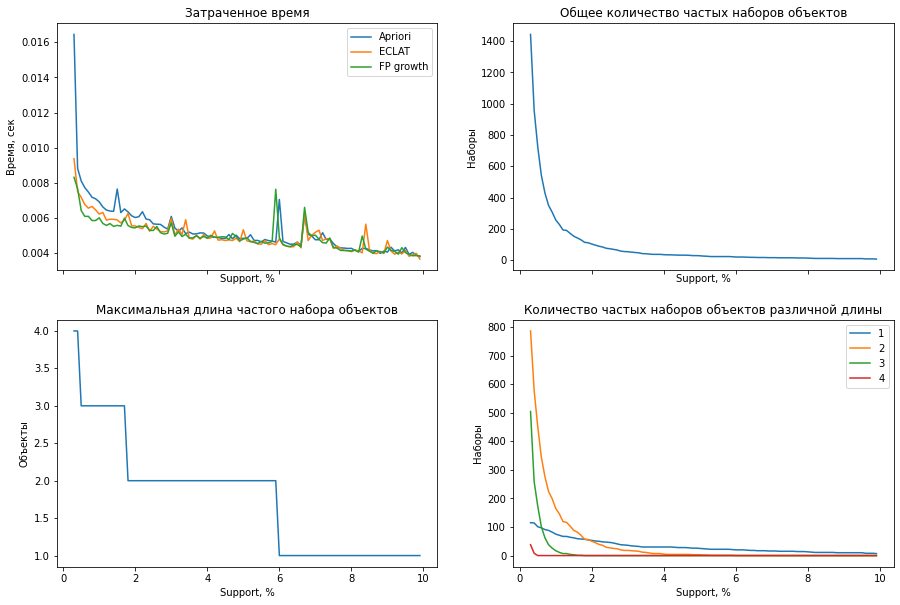

In [ ]:
test_data(basket_data_list) 

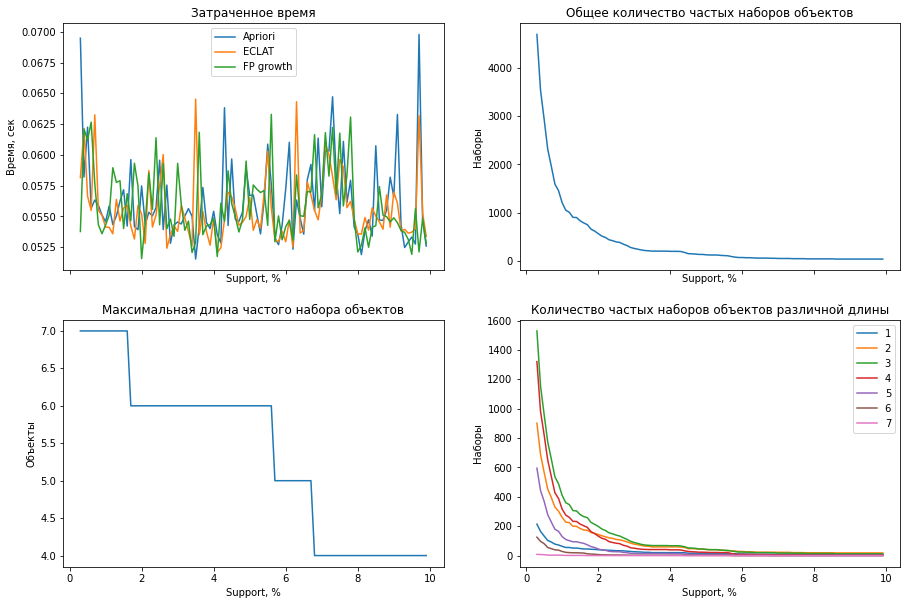

In [ ]:
test_data(airports_data_list)

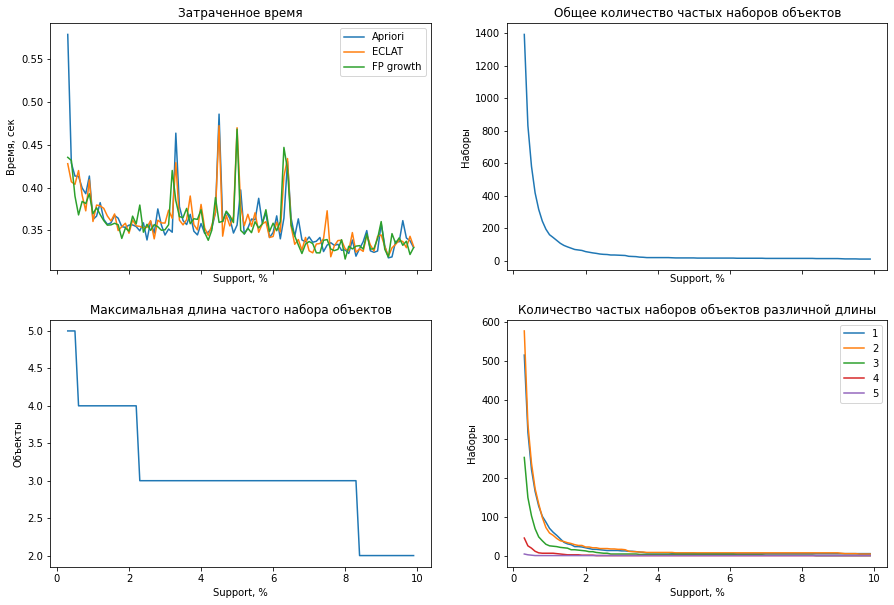

In [ ]:
test_data(retail_data_list) 